# CSC 5741  Data Mining And Warehousing Course Project
# Name : Emmanuel Hansingo  
# Computer Number : 2023008184
# Classification of parliment debates and proceedings; classify responses by MPs as either relevant or not to the motion

In [1]:
import requests as req
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

## Data Extraction From Website

In [71]:
# Step 1: Send a GET request to the webpage and retrieve the HTML content
url = "https://www.parliament.gov.zm/publications/debates-list"  
response = req.get(url)
html_content = response.content

In [72]:
# Step 2: Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the links from the webpage and store them in a list
links = soup.find_all('a')
links

[<a class="element-invisible element-focusable" href="#main-content">Skip to main content</a>,
 <a href="/">Home</a>,
 <a href="https://mail.parliament.gov.zm">Mail</a>,
 <a href="/sacco">NAZ-SACCO</a>,
 <a href="http://streamer.parliament.gov.zm:8063/listen.pls">Radio</a>,
 <a href="/locationmap">Contact Us</a>,
 <a href="/">Home</a>,
 <a href="/node/108" title="">About Parliament</a>,
 <a href="/node/4529">About National Assembly</a>,
 <a href="/node/111" title="">History</a>,
 <a href="/the-clerk" title="">The Clerk's Office</a>,
 <a href="/the-clerk" title="">The Clerk</a>,
 <a href="/node/159">Departments</a>,
 <a href="/node/110">Visiting parliament</a>,
 <a href="/locationmap" title="">Contact Us</a>,
 <a href="/procurement" title="">Procurement</a>,
 <a href="https://www.parliament.gov.zm/procurement" title="">Invitations</a>,
 <a href="https://www.parliament.gov.zm//procurement-plan" title="">Procurement Plan</a>,
 <a href="/node/4529" title="">Parliamentary Calendar</a>,
 <a 

#### Each parliament session was a link on the page named with the date of the session so to extract those links the links were filtered based on the year because each session ended with either 2022 or 2023

In [73]:
# This section creates a list of the specific links that are needed by filtering according
# to the last word which was the year
debate_links = []
for link in links:
    if link.text.endswith('2023') or link.text.endswith('2022'):
        debate_links.append(link)
        
debate_links

[<a href="/node/11032">Tuesday, 28th March, 2023</a>,
 <a href="/node/11002">Friday, 31st March, 2023</a>,
 <a href="/node/11000">Thursday, 30th March, 2023</a>,
 <a href="/node/11001">Wednesday, 29th March, 2023</a>,
 <a href="/node/10999">Friday, 24th March, 2023</a>,
 <a href="/node/10997">Thursday, 23rd March, 2023</a>,
 <a href="/node/10996">Wednesday, 22nd March, 2023</a>,
 <a href="/node/11031">Friday, 17th March, 2023</a>,
 <a href="/node/10988">Thursday, 16th March, 2023</a>,
 <a href="/node/10987">Thursday, 16th March, 2023</a>,
 <a href="/node/10989">Wednesday, 15th March, 2023</a>,
 <a href="/node/10984">Tuesday, 14th March, 2023</a>,
 <a href="/node/10983">Friday, 10th March, 2023</a>,
 <a href="/node/10981">Thursday, 9th March, 2023</a>,
 <a href="/node/10980">Tuesday, 7th March, 2023</a>,
 <a href="/node/10946">Friday, 3rd March, 2023</a>,
 <a href="/node/10940">Thursday, 2nd March, 2023</a>,
 <a href="/node/10933">Wednesday, 1st March, 2023</a>,
 <a href="/node/10931">T

In [74]:
len(debate_links)

50

In [75]:
# Step 4: Loop through the links and scrape data from each linked page
debate_pages = [] # This list will contain the data from each page as list elements

for link in debate_links:
    link_url = link.get('href')  # Extract the URL from the link
    if link_url:
        # Send a request to the linked page and retrieve its content
        linked_page_response = requests.get("https://www.parliament.gov.zm"+link_url)
        linked_page_content = linked_page_response.content

        # Parse the linked page's content using Beautiful Soup
        linked_page_soup = BeautifulSoup(linked_page_content, 'html.parser')
        debate_pages.append(linked_page_soup)

        #Print the page title
        page_title = linked_page_soup.title.text
        print("Page Title:", page_title)

Page Title: Tuesday, 28th March, 2023 | National Assembly of Zambia
Page Title: Friday, 31st March, 2023 | National Assembly of Zambia
Page Title: Thursday, 30th March, 2023 | National Assembly of Zambia
Page Title: Wednesday, 29th March, 2023 | National Assembly of Zambia
Page Title: Friday, 24th March, 2023 | National Assembly of Zambia
Page Title: Thursday, 23rd March, 2023 | National Assembly of Zambia
Page Title: Wednesday, 22nd March, 2023 | National Assembly of Zambia
Page Title: Friday, 17th March, 2023 | National Assembly of Zambia
Page Title: Thursday, 16th March, 2023 | National Assembly of Zambia
Page Title: Thursday, 16th March, 2023 | National Assembly of Zambia
Page Title: Wednesday, 15th March, 2023 | National Assembly of Zambia
Page Title: Tuesday, 14th March, 2023 | National Assembly of Zambia
Page Title: Friday, 10th March, 2023 | National Assembly of Zambia
Page Title: Thursday, 9th March, 2023 | National Assembly of Zambia
Page Title: Tuesday, 7th March, 2023 | Nat

In [76]:
print('Total number of pages extracted: ',len(debate_pages))

Total number of pages extracted:  50


In [77]:
debate_pages[3]

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">

<html dir="ltr" version="XHTML+RDFa 1.0" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://ogp.me/ns#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="http://rdfs.org/sioc/types#" xmlns:skos="http://www.w3.org/2004/02/skos/core#" xmlns:xsd="http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Drupal 7 (http://drupal.org)" name="Generator"/>
<link href="/node/11001" rel="canonical"/>
<link href="/node/11001" rel="shortlink"/>
<link href="https://www.parliament.gov.zm/sites/default/files/coat-of-arms-site.png" rel="shortcut icon" type="image/png"/>
<title>Wednesda

In [118]:
# This section extracts the paragraph 'p' HTML elements from each page and stores them in a list
page_paragraphs = []
for page in debate_pages :
    page_paragraphs.append(page.find_all('p'))


In [119]:
page_paragraphs[2]

[<p class="rtecenter"><em>       Thursday</em>, 30<sup>th </sup><em>March</em>, 2023</p>,
 <p class="rtecenter"><em>The House met at</em> 1430 <em>hours</em></p>,
 <p class="rtecenter">[MADAM SPEAKER <em>in the Chair</em>]</p>,
 <p class="rtecenter">NATIONAL ANTHEM</p>,
 <p class="rtecenter"><strong>PRAYER</strong></p>,
 <p class="rtecenter">_______</p>,
 <p class="rtecenter"><strong>ANNOUNCEMENT BY MADAM SPEAKER</strong></p>,
 <p class="rtecenter">COLLECTION OF BIOMETRIC CARDS FOR HON. MEMBERS OF PARLIAMENT AND STAFF</p>,
 <p class="rtejustify"><strong>Madam Speaker: </strong>Hon. Members, I wish to inform the House that the National Health Insurance Management Authority (NHIMA) has sent to the National Assembly biometric cards for hon. Members of Parliament and staff who registered with the authority on 15<sup>th</sup> December, 2022. The cards may be collected from the National Assembly Clinic on Friday, 31<sup>st</sup> March, 2023, starting at 0900 hours. All hon. Members of Parlia

In [120]:
# This section extracts the text from the paragraph html elements
pages_text = []

# Loop through each paragraph and extract its text
for page in page_paragraphs :
    paragraph_text = []
    for paragraphs in page:
        text = paragraphs.get_text() # Get the text of the paragraph
        if text == 'BILLS':  # This condition omits the last part of the page which just contains Bill readings
            break
        elif text != 'BILLS' and len(text) > 0:
            paragraph_text.append(text) # Append the text to the list of paragraph texts
    pages_text.append(paragraph_text)

# The paragraph_text list now contains the text of each paragraph as a separate string
#print(paragraph_text)

## Text Preprocessing
### This section preprocesses the text extracted from each page

In [121]:
pages_text[2]

['\xa0\xa0\xa0\xa0\xa0\xa0 Thursday, 30th March, 2023',
 'The House met at 1430 hours',
 '[MADAM SPEAKER in the Chair]',
 'NATIONAL ANTHEM',
 'PRAYER',
 '_______',
 'ANNOUNCEMENT BY MADAM SPEAKER',
 'COLLECTION OF BIOMETRIC CARDS FOR HON. MEMBERS OF PARLIAMENT AND STAFF',
 'Madam Speaker: Hon. Members, I wish to inform the House that the National Health Insurance Management Authority (NHIMA) has sent to the National Assembly biometric cards for hon. Members of Parliament and staff who registered with the authority on 15th December, 2022. The cards may be collected from the National Assembly Clinic on Friday, 31st March, 2023, starting at 0900 hours. All hon. Members of Parliament who registered, but did not collect their cards, are encouraged to do so tomorrow.',
 'I thank you.',
 '_______',
 'RULINGS BY MADAM SPEAKER',
 'POINT OF ORDER RAISED ON FRIDAY, 24TH MARCH, 2023, BY MS K. S. MULENGA, HON. MEMBER OF PARLIAMENT FOR KALULUSHI CONSTITUENCY, AGAINST MR L. MWENE, HON. MEMBER OF PARL

In [122]:
for page in pages_text :
    # This deletes the introductory titles e.g dates, national anthem, prayer , announcements
    del page[:7]

In [123]:
# This removes the space characters that indent the tabulated list information
for page in pages_text :
    for i in range (10):
        for line in page :
            if line.startswith('\xa0'):
                page.remove(line)



In [124]:
# This removes the sentences spoken by the speaker since only MPs responses will be classified
for page in pages_text :
    for line in page :
        if line.startswith('Madam Speaker:') or line.startswith('QUESTION'):
            page.remove(line)

In [9]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [126]:
# This section tokenizes all the sentences and stores each sentence as a list of words
# in a bigger list for the entire page while the pages are elements in the master list
page_tokens = []
for page in pages_text :
    paragraph_tokens = []
    for sentence in page :
        tokens = word_tokenize(sentence)
        paragraph_tokens.append(tokens)
    page_tokens.append(paragraph_tokens)

page_tokens[0]

[['WORKSHOP',
  'ON',
  'THE',
  'ROLE',
  'OF',
  'ZANACO',
  'IN',
  'THE',
  'CDF',
  'EMPOWERMENT',
  'LOAN',
  'PROGRAMME'],
 ['As',
  'members',
  'of',
  'the',
  'CDF',
  'committees',
  'in',
  'your',
  'various',
  'constituencies',
  ',',
  'the',
  'information',
  'which',
  'will',
  'be',
  'shared',
  'during',
  'this',
  'workshop',
  'will',
  'be',
  'beneficial',
  'for',
  'the',
  'success',
  'of',
  'the',
  'programme',
  '.',
  'All',
  'hon',
  '.',
  'Members',
  'of',
  'Parliament',
  'are',
  ',',
  'therefore',
  ',',
  'being',
  'requested',
  'to',
  'attend',
  'the',
  'workshop',
  'which',
  'will',
  'be',
  'held',
  'on',
  'Wednesday',
  ',',
  '29th',
  'March',
  ',',
  '2023',
  ',',
  'in',
  'the',
  'Amphitheatre',
  ',',
  'here',
  'at',
  'Parliament',
  'Main',
  'Buildings',
  ',',
  'starting',
  'from',
  '0930',
  'hours',
  'to',
  '1230',
  'hours',
  '.'],
 ['Please',
  'note',
  'that',
  'attendance',
  'to',
  'the',
  'w

In [128]:
# This section removes none apha-numeric characters from the token lists
for page in page_tokens :
    for sentence in page:
        for word in sentence:
            if not word.isalnum():
                sentence.remove(word)

In [129]:
# This section filters out the stop words from the tokens
stop_words= set(stopwords.words('english'))

filtered = []
for page in page_tokens :
    filtered_page = []
    for sentence in page:
        word_list = []
        for word in sentence:
            if word not in stop_words:
                word_list.append(word)
        filtered_page.append(word_list)
    filtered.append(filtered_page)
    
print(filtered[0])

[['WORKSHOP', 'ON', 'THE', 'ROLE', 'OF', 'ZANACO', 'IN', 'THE', 'CDF', 'EMPOWERMENT', 'LOAN', 'PROGRAMME'], ['As', 'members', 'CDF', 'committees', 'various', 'constituencies', 'information', 'shared', 'workshop', 'beneficial', 'success', 'programme', 'All', 'hon', 'Members', 'Parliament', 'therefore', 'requested', 'attend', 'workshop', 'held', 'Wednesday', '29th', 'March', '2023', 'Amphitheatre', 'Parliament', 'Main', 'Buildings', 'starting', '0930', 'hours', '1230', 'hours'], ['Please', 'note', 'attendance', 'workshop', 'voluntary', 'basis'], ['Hon', 'Members', 'Question'], ['Interruptions'], ['However', 'I', 'urge', 'hon', 'Members', 'attend', 'important', 'workshop', 'make', 'opportunity'], ['I', 'thank'], ['Interruptions'], ['Laughter'], [], ['IMPACT', 'OF', 'CYCLONE', 'FREDDY', 'ON', 'CHAMA', 'DISTRICT'], ['232', 'Mr', 'Mtayachalo', 'Chama', 'North', 'asked'], ['The', 'Mrs', 'Nalumango', 'Madam', 'Speaker', 'Government', 'aware', 'destruction', 'crops', 'houses', 'Chama', 'Distric

In [137]:
# To remove empty sentences
for i in range(10):
    for page in filtered:
        for sentence in page:
            if len(sentence) == 0 :
                page.remove(sentence)

In [152]:
# To remove very short responses that don't give much context
for i in range(10):
    for page in filtered:
        for sentence in page:
            if (len(sentence) < 10 and sentence[0].isupper() == False) and len(sentence[0]) < 2 :
                page.remove(sentence)

In [153]:
len(filtered[0])

271

In [154]:
# This section joins the tokens back together and makes a list for each extracted page
pages_text = []
for page in filtered :
    page_text = []
    for sentence in page:
        page_text.append(' '.join(sentence))
    pages_text.append(page_text)

pages_text[0]

['WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPOWERMENT LOAN PROGRAMME',
 'As members CDF committees various constituencies information shared workshop beneficial success programme All hon Members Parliament therefore requested attend workshop held Wednesday 29th March 2023 Amphitheatre Parliament Main Buildings starting 0930 hours 1230 hours',
 'However I urge hon Members attend important workshop make opportunity',
 'I thank',
 'IMPACT OF CYCLONE FREDDY ON CHAMA DISTRICT',
 'The Mrs Nalumango Madam Speaker Government aware destruction crops houses Chama District caused Cyclone Freddy 15th 16th March 2023 The following indicates hectarage damaged crop fields number houses completely destroyed ward',
 'Madam Speaker immediate relief urgent measures support affected communities Chama District Government Disaster Management Mitigation Unit DMMU provided food relief items follows',
 'Madam Speaker addition House may wish note Chama District already received 718 metric tonnes relief maize 

In [155]:
# This section creates a dictionary for each page with topics as keys and responces as elements in a list 
# corresponding to the key. The page dictionaries are then stored in a list 'pages_dict_list'

pages_dict_list = []
topics = []
count = 0
for page in pages_text:
    page_dict = {}
    topic_list = []
    count += 1
    print(count) # To make sure that the final total is equal to the number of pages extracted
    for line in page:
        if line.isupper():
            key = line
            l = []
            topic_list.append(key)
            page_dict[key] = l
            page_num = count # Keeps record of the page the key(topic) is from to prevent cross over page keyerror
            continue
        if page_num == count:   #Prevents a key error from a different page
            page_dict[key].append(line)
        else:
            continue
            
    pages_dict_list.append(page_dict)
    topics.extend(topic_list)

    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [156]:
pages_dict_list[0]

{'WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPOWERMENT LOAN PROGRAMME': ['As members CDF committees various constituencies information shared workshop beneficial success programme All hon Members Parliament therefore requested attend workshop held Wednesday 29th March 2023 Amphitheatre Parliament Main Buildings starting 0930 hours 1230 hours',
  'However I urge hon Members attend important workshop make opportunity',
  'I thank'],
 'IMPACT OF CYCLONE FREDDY ON CHAMA DISTRICT': ['The Mrs Nalumango Madam Speaker Government aware destruction crops houses Chama District caused Cyclone Freddy 15th 16th March 2023 The following indicates hectarage damaged crop fields number houses completely destroyed ward',
  'Madam Speaker immediate relief urgent measures support affected communities Chama District Government Disaster Management Mitigation Unit DMMU provided food relief items follows',
  'Madam Speaker addition House may wish note Chama District already received 718 metric tonnes relief m

In [157]:
len(set(topics))

405

In [161]:
# This section creates a dataframe from the dictionaries making the topics and responces categorical data 
# corresponding to each other.

df = pd.DataFrame({"Motion/Topic": [], "MP Response": []})
for page in pages_dict_list:
    
    # Create two lists, one for the categories and one for the values
    categories = []
    values = []
    for key, val in page.items():
        categories.extend([key] * len(val))
        values.extend(val)

    # Create a DataFrame from the lists
    df2 = pd.DataFrame({"Motion/Topic": categories, "MP Response": values})
    
    # Join the resulting DataFrame to the original dataframe
    df = pd.concat([df, df2])
    

df = df.reset_index(drop=True)
df

,Motion/Topic,MP Response
0,WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPO...,As members CDF committees various constituenci...
1,WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPO...,However I urge hon Members attend important wo...
2,WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPO...,I thank
3,IMPACT OF CYCLONE FREDDY ON CHAMA DISTRICT,The Mrs Nalumango Madam Speaker Government awa...
4,IMPACT OF CYCLONE FREDDY ON CHAMA DISTRICT,Madam Speaker immediate relief urgent measures...
...,...,...
14565,THE CHAIRPERSON OF COMMITTEES,Madam Chairperson also looked mining policy go...
14566,THE CHAIRPERSON OF COMMITTEES,Sometimes I wonder Madam Chairperson Certain p...
14567,THE CHAIRPERSON OF COMMITTEES,Madam Chairperson one reasons Zambians benefit...
14568,HOUSE RESUMED,MADAM SPEAKER Chair


In [162]:
df.to_csv('Course_Project_Data.csv')

In [163]:
df = pd.read_csv('Course_Project_Data.csv')
df

,Unnamed: 0,Motion/Topic,MP Response
0,0,WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPO...,As members CDF committees various constituenci...
1,1,WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPO...,However I urge hon Members attend important wo...
2,2,WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPO...,I thank
3,3,IMPACT OF CYCLONE FREDDY ON CHAMA DISTRICT,The Mrs Nalumango Madam Speaker Government awa...
4,4,IMPACT OF CYCLONE FREDDY ON CHAMA DISTRICT,Madam Speaker immediate relief urgent measures...
...,...,...,...
14565,14565,THE CHAIRPERSON OF COMMITTEES,Madam Chairperson also looked mining policy go...
14566,14566,THE CHAIRPERSON OF COMMITTEES,Sometimes I wonder Madam Chairperson Certain p...
14567,14567,THE CHAIRPERSON OF COMMITTEES,Madam Chairperson one reasons Zambians benefit...
14568,14568,HOUSE RESUMED,MADAM SPEAKER Chair


In [164]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [165]:
df.isnull().sum()

Motion/Topic    0
MP Response     0
dtype: int64

In [32]:
df = df.dropna()
df.isnull().sum()

Motion/Topic    0
MP Response     0
dtype: int64

In [168]:
df

,Motion/Topic,MP Response
0,WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPO...,As members CDF committees various constituenci...
1,WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPO...,However I urge hon Members attend important wo...
2,WORKSHOP ON THE ROLE OF ZANACO IN THE CDF EMPO...,I thank
3,IMPACT OF CYCLONE FREDDY ON CHAMA DISTRICT,The Mrs Nalumango Madam Speaker Government awa...
4,IMPACT OF CYCLONE FREDDY ON CHAMA DISTRICT,Madam Speaker immediate relief urgent measures...
...,...,...
14565,THE CHAIRPERSON OF COMMITTEES,Madam Chairperson also looked mining policy go...
14566,THE CHAIRPERSON OF COMMITTEES,Sometimes I wonder Madam Chairperson Certain p...
14567,THE CHAIRPERSON OF COMMITTEES,Madam Chairperson one reasons Zambians benefit...
14568,HOUSE RESUMED,MADAM SPEAKER Chair


In [190]:
df.reset_index(drop=True, inplace=True)

In [169]:
len(df['Motion/Topic'].unique())

378

In [170]:
# Changing the casing to lower case for all samples
df['Motion/Topic'] = df['Motion/Topic'].str.lower()
df['MP Response'] = df['MP Response'].str.lower()

In [171]:
df

,Motion/Topic,MP Response
0,workshop on the role of zanaco in the cdf empo...,as members cdf committees various constituenci...
1,workshop on the role of zanaco in the cdf empo...,however i urge hon members attend important wo...
2,workshop on the role of zanaco in the cdf empo...,i thank
3,impact of cyclone freddy on chama district,the mrs nalumango madam speaker government awa...
4,impact of cyclone freddy on chama district,madam speaker immediate relief urgent measures...
...,...,...
14565,the chairperson of committees,madam chairperson also looked mining policy go...
14566,the chairperson of committees,sometimes i wonder madam chairperson certain p...
14567,the chairperson of committees,madam chairperson one reasons zambians benefit...
14568,house resumed,madam speaker chair


## Further cleaning of the data to remove irrelevant topic names e.g Adjournments

In [167]:
df['Motion/Topic'].value_counts()['adjournment']

25

In [166]:
df['Motion/Topic'].value_counts()['house resumed']

17

In [172]:
df['Motion/Topic'].value_counts()['the chairperson of committees']

1141

In [173]:
df['Motion/Topic'].value_counts()['committees of supply']

162

In [175]:
df['Motion/Topic'].value_counts()["the s question time"]

793

In [176]:
df['Motion/Topic'].value_counts()["acting chief whip"]

191

In [177]:
df['Motion/Topic'].value_counts()["business of the house"]

42

In [178]:
df = df[~(df['Motion/Topic'] == 'house resumed')]
df = df[~(df['Motion/Topic'] == 'adjournment')]
df = df[~(df['Motion/Topic'] == 'the chairperson of committees')]
df = df[~(df['Motion/Topic'] == 'committees of supply')]
df = df[~(df['Motion/Topic'] == "the ’ s question time")]
df = df[~(df['Motion/Topic'] == 'acting chief whip')]
df = df[~(df['Motion/Topic'] == 'business of the house')]

In [179]:
df = df[~(df['Motion/Topic'] == 'the deputy chairperson of committees')]
df = df[~(df['Motion/Topic'] == 'season')]
df = df[~(df['Motion/Topic'] == 'motion of thanks')]
df = df[~(df['Motion/Topic'] == 'the president s address')]
df = df[~(df['Motion/Topic'] == 'rate')]

In [188]:
df = df[~(df['Motion/Topic'] == 'the delegation from parliament of uganda')]
df = df[~(df['Motion/Topic'] == 'the delegation from parliament of namibia')]
df = df[~(df['Motion/Topic'] == 'chasefu')]
df = df[~(df['Motion/Topic'] == 'report of the planning and budgeting committee')]

In [184]:
df = df[~(df['MP Response'] == 'i thank madam speaker')]
df = df[~(df['MP Response'] == 'i thank')]

In [191]:
df

,Motion/Topic,MP Response
0,workshop on the role of zanaco in the cdf empo...,as members cdf committees various constituenci...
1,workshop on the role of zanaco in the cdf empo...,however i urge hon members attend important wo...
2,impact of cyclone freddy on chama district,the mrs nalumango madam speaker government awa...
3,impact of cyclone freddy on chama district,madam speaker immediate relief urgent measures...
4,impact of cyclone freddy on chama district,madam speaker addition house may wish note cha...
...,...,...
10067,progress on the exploration of gas and oil in ...,mr kabuswe madam speaker licence conditions re...
10068,progress on the exploration of gas and oil in ...,mr malambo magoye madam speaker chisanga area ...
10069,progress on the exploration of gas and oil in ...,mr kabuswe madam speaker issue gwembe somethin...
10070,progress on the exploration of gas and oil in ...,mr mwambazi bwana mkubwa madam speaker issue o...


In [192]:
len(df['Motion/Topic'].unique())

358

In [198]:
# Making a column of zeros for the labels to be labeled manually later
import numpy as np
df['Label'] = np.zeros((len(df),1))
df

,Motion/Topic,MP Response,Label
0,workshop on the role of zanaco in the cdf empo...,as members cdf committees various constituenci...,0.0
1,workshop on the role of zanaco in the cdf empo...,however i urge hon members attend important wo...,0.0
2,impact of cyclone freddy on chama district,the mrs nalumango madam speaker government awa...,0.0
3,impact of cyclone freddy on chama district,madam speaker immediate relief urgent measures...,0.0
4,impact of cyclone freddy on chama district,madam speaker addition house may wish note cha...,0.0
...,...,...,...
10067,progress on the exploration of gas and oil in ...,mr kabuswe madam speaker licence conditions re...,0.0
10068,progress on the exploration of gas and oil in ...,mr malambo magoye madam speaker chisanga area ...,0.0
10069,progress on the exploration of gas and oil in ...,mr kabuswe madam speaker issue gwembe somethin...,0.0
10070,progress on the exploration of gas and oil in ...,mr mwambazi bwana mkubwa madam speaker issue o...,0.0


In [ ]:
df.to_csv('Project_Data.csv')

### The samples in the dataset were labeled manually and out of the 10071 only 1148 were labeled due to the large size of the dataset and a new dataset created from the labeled samples for classification

In [15]:
df = pd.read_csv('Project_Data2.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Motion/Topic,MP Response,Label
0,workshop on the role of zanaco in the cdf empo...,member cdf committee constituency information ...,1
1,workshop on the role of zanaco in the cdf empo...,urge member attend important workshop make opp...,1
2,impact of cyclone freddy on chama district,mr nalumango madam speaker government aware de...,1
3,impact of cyclone freddy on chama district,madam speaker immediate relief urgent measure ...,1
4,impact of cyclone freddy on chama district,madam speaker addition house wish note chama d...,1
...,...,...,...
1142,mr kapyanga hon member for mpika on mr lufuma ...,i seek serious ruling,0
1143,mr kapyanga hon member for mpika on mr lufuma ...,madam first deputy speaker hon members i think...,0
1144,mr kapyanga hon member for mpika on mr lufuma ...,however let offer guide hon members please pla...,0
1145,mr kapyanga hon member for mpika on mr lufuma ...,now i going ruling of course hon member order ...,0


In [16]:
df2 = df.copy()
df2

,Motion/Topic,MP Response,Label
0,workshop on the role of zanaco in the cdf empo...,member cdf committee constituency information ...,1
1,workshop on the role of zanaco in the cdf empo...,urge member attend important workshop make opp...,1
2,impact of cyclone freddy on chama district,mr nalumango madam speaker government aware de...,1
3,impact of cyclone freddy on chama district,madam speaker immediate relief urgent measure ...,1
4,impact of cyclone freddy on chama district,madam speaker addition house wish note chama d...,1
...,...,...,...
1142,mr kapyanga hon member for mpika on mr lufuma ...,i seek serious ruling,0
1143,mr kapyanga hon member for mpika on mr lufuma ...,madam first deputy speaker hon members i think...,0
1144,mr kapyanga hon member for mpika on mr lufuma ...,however let offer guide hon members please pla...,0
1145,mr kapyanga hon member for mpika on mr lufuma ...,now i going ruling of course hon member order ...,0


### The following functions will further process the text by lemmatizing it and removing stopwords

In [7]:
def further_ops(df):
    for i in range(len(df)):
        response = df["MP Response"].iloc[i]
        token = word_tokenize(response)
        token_no_sw = [word for word in token if word not in stopwords.words()]
        lemmatizer = WordNetLemmatizer()
        lemm_token = [lemmatizer.lemmatize(word) for word in token_no_sw]
        df["MP Response"].iloc[i] = " ".join(lemm_token)
    return df   

def further_ops_motion(df):
    for i in range(len(df)):
        response = df["Motion/Topic"].iloc[i]
        token = word_tokenize(response)
        token_no_sw = [word for word in token if word not in stopwords.words()]
        lemmatizer = WordNetLemmatizer()
        lemm_token = [lemmatizer.lemmatize(word) for word in token_no_sw]
        df["Motion/Topic"].iloc[i] = " ".join(lemm_token)
    return df 

In [17]:
df3 = further_ops(df2)
df3.head(10)

/home/emmanuelhansingo/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Motion/Topic,MP Response,Label
0,workshop on the role of zanaco in the cdf empo...,member cdf committee constituency information ...,1
1,workshop on the role of zanaco in the cdf empo...,urge member attend important workshop make opp...,1
2,impact of cyclone freddy on chama district,mr nalumango madam speaker government aware de...,1
3,impact of cyclone freddy on chama district,madam speaker immediate relief urgent measure ...,1
4,impact of cyclone freddy on chama district,madam speaker addition house wish note chama d...,1
5,impact of cyclone freddy on chama district,madam speaker detail relief maize distributed ...,1
6,impact of cyclone freddy on chama district,madam speaker office dmmu planned conduct comp...,1
7,impact of cyclone freddy on chama district,madam speaker dmmu begin conducting sensitisat...,1
8,impact of cyclone freddy on chama district,madam speaker government dmmu 24th march 2023 ...,1
9,impact of cyclone freddy on chama district,mr mtayachalo madam speaker honour reaction st...,1


In [20]:
df3 = further_ops_motion(df3)
df3.head(10)

,Motion/Topic,MP Response,Label
0,workshop role zanaco cdf empowerment loan prog...,member cdf committee constituency information ...,1
1,workshop role zanaco cdf empowerment loan prog...,urge member attend important workshop make opp...,1
2,impact cyclone freddy chama district,mr nalumango madam speaker government aware de...,1
3,impact cyclone freddy chama district,madam speaker immediate relief urgent measure ...,1
4,impact cyclone freddy chama district,madam speaker addition house wish note chama d...,1
5,impact cyclone freddy chama district,madam speaker detail relief maize distributed ...,1
6,impact cyclone freddy chama district,madam speaker office dmmu planned conduct comp...,1
7,impact cyclone freddy chama district,madam speaker dmmu begin conducting sensitisat...,1
8,impact cyclone freddy chama district,madam speaker government dmmu 24th march 2023 ...,1
9,impact cyclone freddy chama district,mr mtayachalo madam speaker honour reaction st...,1


# Exploratory Data Analysis (EDA)

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

In [85]:
print(f"Number Of different motions is {len(df3['Motion/Topic'].unique())}")

Number Of different motions is 52


### Target Distribution of samples in the dataset

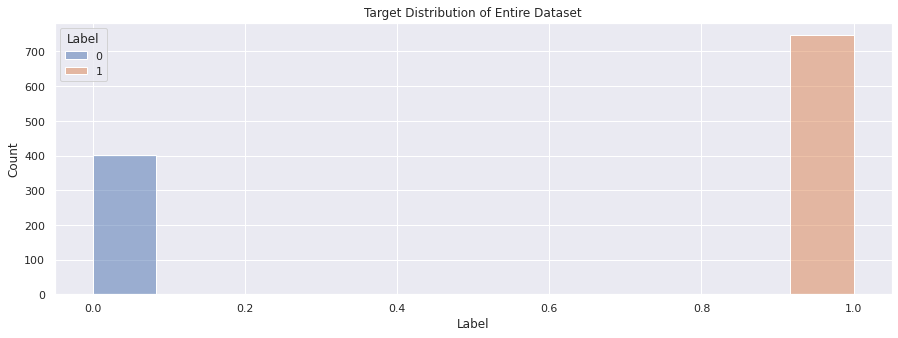

In [118]:
plt.figure(figsize=(15, 5))
plt.title('Target Distribution of Entire Dataset')
_ = sns.histplot(data=df3, x='Label',hue = 'Label')

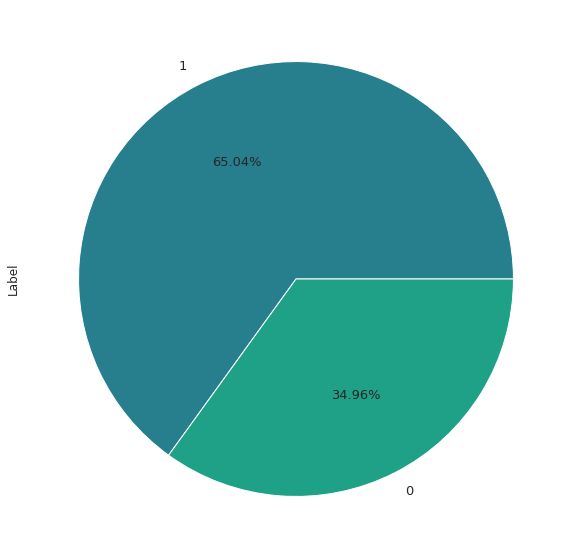

In [91]:
plt.figure(figsize=(10, 10))
Pie_data = df3['Label'].value_counts().plot.pie(
  autopct='%1.2f%%',
  fontsize=13,
  colors=sns.color_palette('viridis')[2:],
)

#### The dataset distribution was slightly skewed with relevant responses accounting for 65% of the responses

### Count Distribution for the responses in each motion

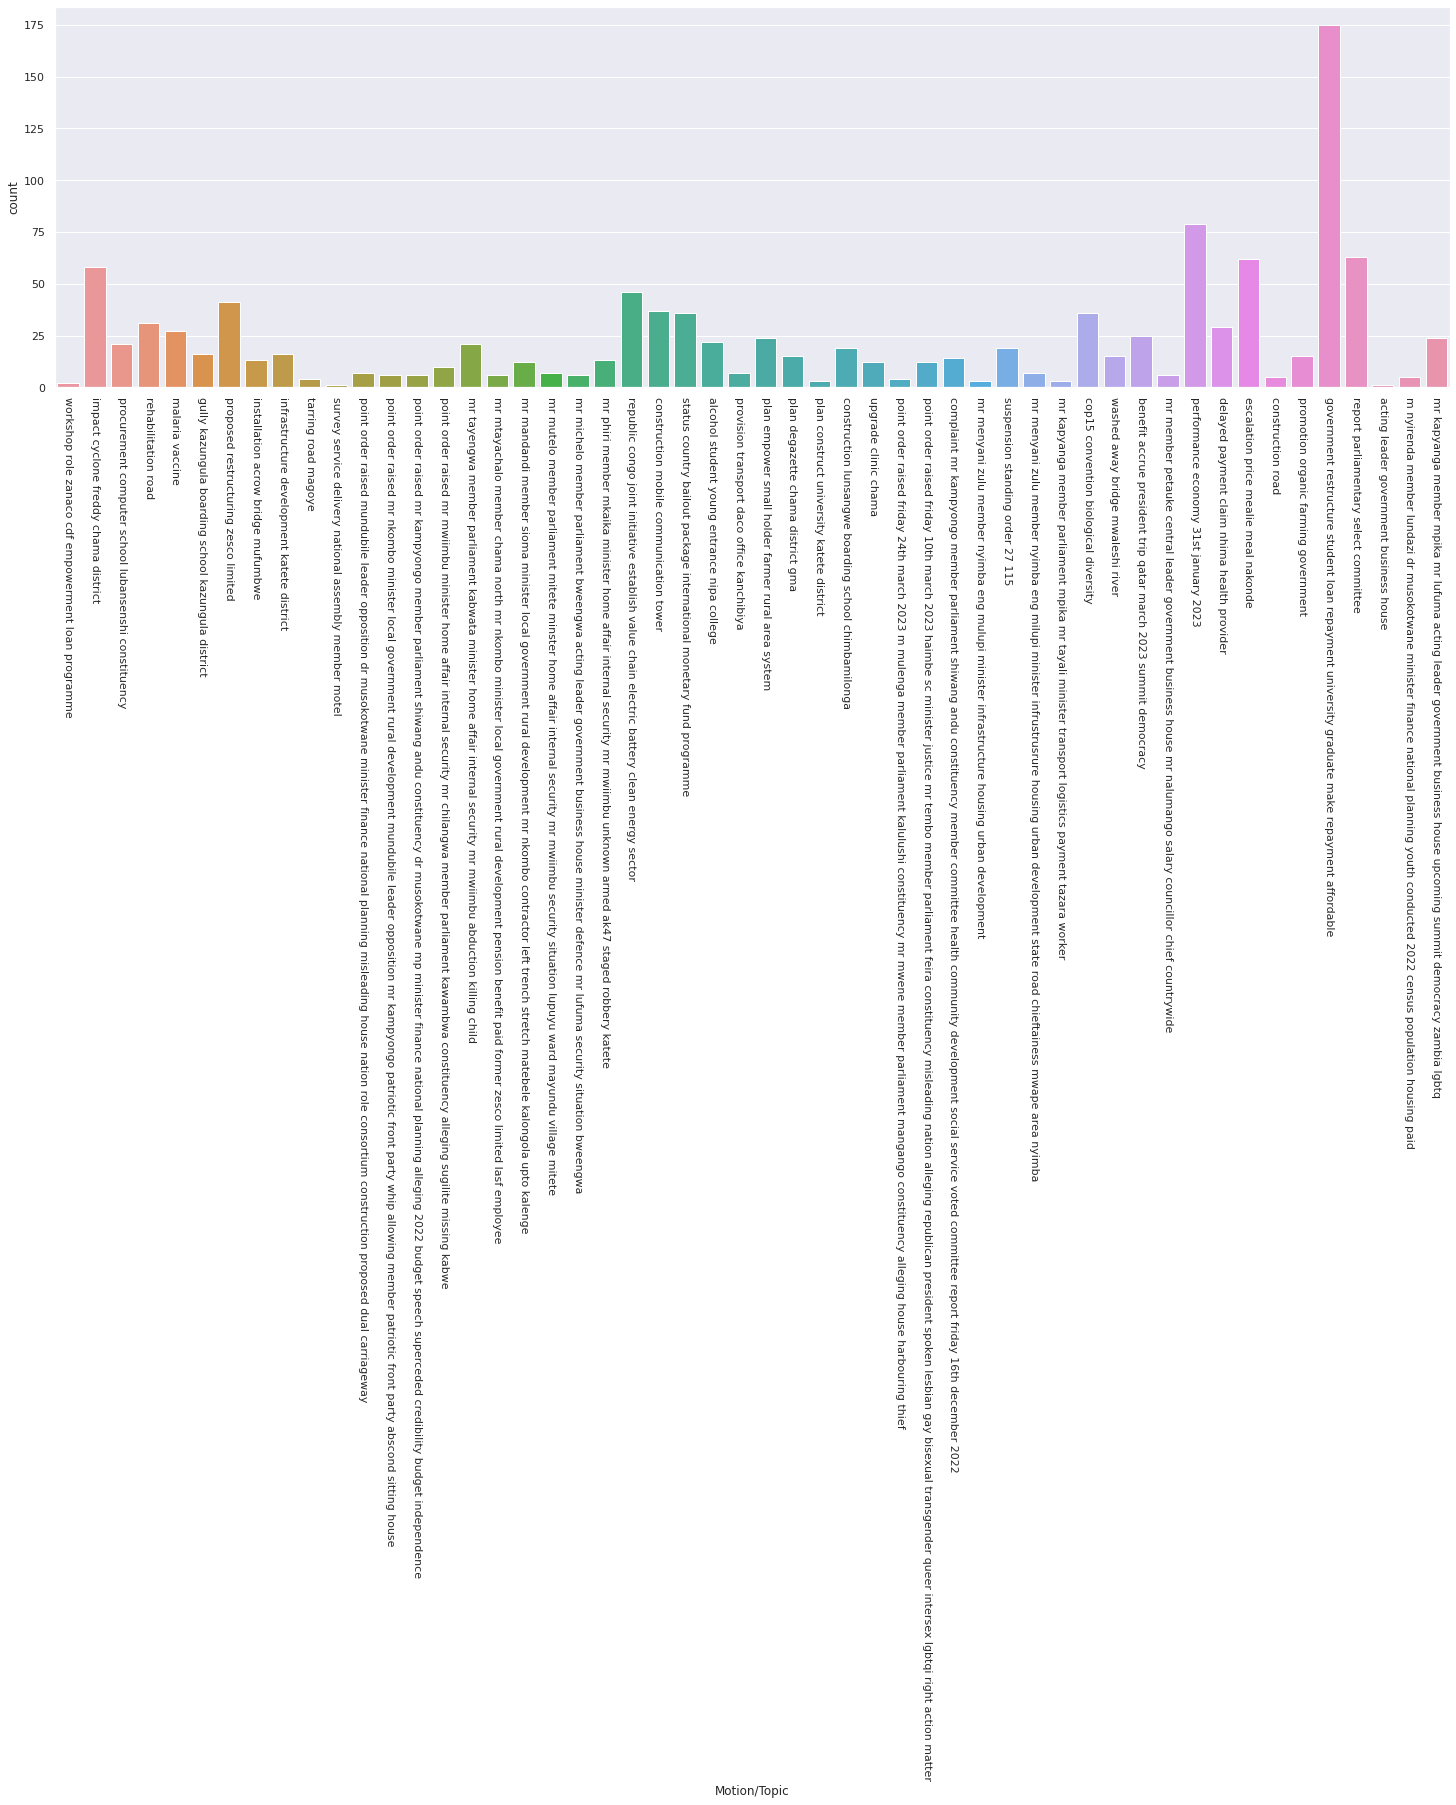

In [107]:
plt.figure(figsize=(25, 7))
sns.countplot(x='Motion/Topic', data=df3)
plt.xticks(rotation=-90)
plt.show()

#### From the count plot it can be seen that the topic that had the most responses in the dataset was the topic on restructuring student loan payments, so we explore the distribution of relevant to irrelevant responses on this topic

In [115]:
df3[df3['Motion/Topic'] == 'government restructure student loan repayment university graduate make repayment affordable']

,Motion/Topic,MP Response,Label
879,government restructure student loan repayment ...,mr mukosa chinsali behalf mr kafwaya lunte mad...,1
880,government restructure student loan repayment ...,mr mukosa madam speaker 2016 national assembly...,1
881,government restructure student loan repayment ...,madam speaker helsb mandated thing determine c...,1
882,government restructure student loan repayment ...,madam speaker wish note enactment law graduate...,1
883,government restructure student loan repayment ...,madam speaker mention motion informed campaign...,1
...,...,...,...
1049,government restructure student loan repayment ...,madam speaker policy formulation stage identif...,1
1050,government restructure student loan repayment ...,mr mukosa madam speaker bringing issue person ...,1
1051,government restructure student loan repayment ...,mr mukosa madam speaker minister education min...,0
1052,government restructure student loan repayment ...,mr mukosa madam speaker withdraw word foolish ...,0


#### 175 samples from this topic represents 15% of the entire dataset

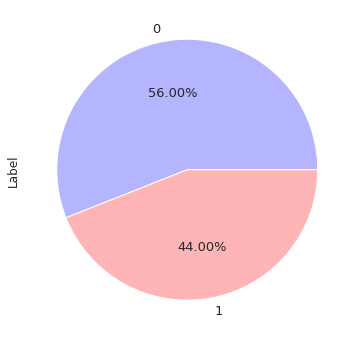

In [146]:
plt.figure(figsize=(6, 6))
Pie_data = df3[df3['Motion/Topic'] == 'government restructure student loan repayment university graduate make repayment affordable']['Label'].value_counts().plot.pie(
  autopct='%1.2f%%',
  fontsize=13,
  colors=sns.color_palette('seismic')[2:],
)

#### The distribution of labels was fairly even for relevant and irrelevant responses

# Feature Extraction and Model Development

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [22]:
from sklearn.model_selection import train_test_split

#### Each feature column is vectorized separately since the label is classified based on the relationship between the motion and MP response. The two vectors are then joined together horizontally. Vectorizing them together would take away the dependency.

In [23]:
cv1 = CountVectorizer(ngram_range=(1,3))
cv2 = CountVectorizer(ngram_range=(1,3))

# Fit and transform each column separately
CVx1 = cv1.fit_transform(df3['Motion/Topic'])
CVx2 = cv2.fit_transform(df3['MP Response'])

# Combine the feature matrices horizontally
x1 = hstack([CVx1, CVx2])

In [24]:
tf1 = TfidfVectorizer(ngram_range=(1,3))
tf2 = TfidfVectorizer(ngram_range=(1,3))

# Fit and transform each column separately
TFx1 = tf1.fit_transform(df3['Motion/Topic'])
TFx2 = tf2.fit_transform(df3['MP Response'])

# Combine the feature matrices horizontally
x2 = hstack([TFx1, TFx2])

In [161]:
from sklearn import metrics
# Dictionaries to store the different classifiers and their accuracies
accuracy = {}
model = {}
vectorizer = {"CountVectorizer":cv1,"TfidfVectorizer":tf1}
precision_dict = {}
recall_dict = {}
f1Score = {}
precision_dict['Precision'] = []
recall_dict['recall'] = []
f1Score['F1 Score'] = []

## Support Vector Machine

### SVM Classifier with CountVectorizer

In [26]:
from sklearn import svm

In [162]:

y = df3["Label"].astype("int")
x_train,x_test, y_train, y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [163]:

classifier = svm.SVC()
classifier.fit(x_train,y_train)
y_predict1 = classifier.predict((x_test))
k = "Support Vector Machine with CountVectorizer"
model[k] = classifier

In [164]:
acc = metrics.accuracy_score(y_test, y_predict1)
recall = metrics.recall_score(y_test, y_predict1)
accuracy[k] = float("{0:.4f}".format(acc))
print(k)
print("Accuracy: ",accuracy[k])
print("Recall  : {0:.4f}".format(recall))

Support Vector Machine with CountVectorizer
Accuracy:  0.8348
Recall  : 0.9521


In [165]:
precision_dict['Precision'].append(float("{0:.4f}".format(metrics.precision_score(y_test, y_predict1))))
recall_dict['recall'].append(float("{0:.4f}".format(metrics.recall_score(y_test, y_predict1))))
f1Score['F1 Score'].append(float("{0:.4f}".format(metrics.f1_score(y_test, y_predict1))))

In [144]:
print('Precision : {0:.4f}'.format(metrics.precision_score(y_test, y_predict1)))
print('F1 score :{0:.4f}'.format(metrics.f1_score(y_test, y_predict1)))

Precision : 0.8176
F1 score :0.8797


### SVM Classifier with TfidVectorizer

In [166]:

y = df3["Label"].astype("int")
x_train,x_test, y_train, y_test = train_test_split(x2,y,test_size=0.2,random_state=42)

In [167]:

classifier = svm.SVC()
classifier.fit(x_train,y_train)
y_predict2 = classifier.predict((x_test))
k = "Support Vector Machine with TfidVectorizer"
model[k] = classifier

In [168]:
acc = metrics.accuracy_score(y_test, y_predict2)
recall = metrics.recall_score(y_test, y_predict2)
accuracy[k] = float("{0:.4f}".format(acc))
print(k)
print("Accuracy: ",accuracy[k])
print("Recall  : {0:.4f}".format(recall))

Support Vector Machine with TfidVectorizer
Accuracy:  0.7
Recall  : 0.8904


In [169]:
precision_dict['Precision'].append(float("{0:.4f}".format(metrics.precision_score(y_test, y_predict2))))
recall_dict['recall'].append(float("{0:.4f}".format(metrics.recall_score(y_test, y_predict2))))
f1Score['F1 Score'].append(float("{0:.4f}".format(metrics.f1_score(y_test, y_predict2))))

In [170]:
precision_dict

{'Precision': [0.8176, 0.7104]}

## Multinomial Naive Bayes

### Multinomial NB with CountVectorizer

In [171]:
x_train,x_test, y_train, y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [172]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train,y_train)
y_predict3 = classifier.predict(x_test)
k = "Multinomial Naive Bayes with CountVectorizer"
model[k]=nb

In [173]:
acc = metrics.accuracy_score(y_test, y_predict3)
recall = metrics.recall_score(y_test, y_predict3)
accuracy[k] = float("{0:.4f}".format(acc))
print(k)
print("Accuracy: ",accuracy[k])
print("Recall  : {0:.4f}".format(recall))

Multinomial Naive Bayes with CountVectorizer
Accuracy:  0.6348
Recall  : 1.0000


In [174]:
precision_dict['Precision'].append(float("{0:.4f}".format(metrics.precision_score(y_test, y_predict3))))
recall_dict['recall'].append(float("{0:.4f}".format(metrics.recall_score(y_test, y_predict3))))
f1Score['F1 Score'].append(float("{0:.4f}".format(metrics.f1_score(y_test, y_predict3))))

### Multinomial NB with TfidVectorizer

In [175]:
x_train,x_test, y_train, y_test = train_test_split(x2,y,test_size=0.2,random_state=42)

In [176]:

nb = MultinomialNB()
nb.fit(x_train,y_train)
y_predict4 = classifier.predict(x_test)
k = "Multinomial Naive Bayes with TfidVectorizer"
model[k]=nb

In [177]:
acc = metrics.accuracy_score(y_test, y_predict4)
recall = metrics.recall_score(y_test, y_predict4)
accuracy[k] = float("{0:.4f}".format(acc))
print(k)
print("Accuracy: ",accuracy[k])
print("Recall  : {0:.4f}".format(recall))

Multinomial Naive Bayes with TfidVectorizer
Accuracy:  0.7
Recall  : 0.8904


In [178]:
precision_dict['Precision'].append(float("{0:.4f}".format(metrics.precision_score(y_test, y_predict4))))
recall_dict['recall'].append(float("{0:.4f}".format(metrics.recall_score(y_test, y_predict4))))
f1Score['F1 Score'].append(float("{0:.4f}".format(metrics.f1_score(y_test, y_predict4))))

## Decision Tree Classifier

### CountVectorizer

In [180]:
x_train,x_test, y_train, y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [136]:
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()

params = {
    'max_depth' : [2,4,6],
    'min_samples_split' : [2,4,6,8],
    'max_features' : ['auto','sqrt','log2'],
    'min_samples_leaf': [1,2,3,4]
}

grid_search = GridSearchCV(dtree,params,cv=5, scoring='recall')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [181]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred1 = dtc.predict(x_test)
k = "Decision Tree Classifier with CountVectorizer"
model[k]= dtc

In [182]:
acc = metrics.accuracy_score(y_test, y_pred1)
recall = metrics.recall_score(y_test, y_pred1)
accuracy[k] = acc
print(k)
print("Accuracy: {0:.4f}".format(acc))
print("Recall  : {0:.4f}".format(recall))

Decision Tree Classifier with CountVectorizer
Accuracy: 0.7478
Recall  : 0.8356


In [183]:
precision_dict['Precision'].append(float("{0:.4f}".format(metrics.precision_score(y_test, y_pred1))))
recall_dict['recall'].append(float("{0:.4f}".format(metrics.recall_score(y_test, y_pred1))))
f1Score['F1 Score'].append(float("{0:.4f}".format(metrics.f1_score(y_test, y_pred1))))

### TfidVectorizer

In [184]:
x_train,x_test, y_train, y_test = train_test_split(x2,y,test_size=0.2,random_state=42)

In [185]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred1 = dtc.predict(x_test)
k = "Decision Tree Classifier with TfidVectorizer"
model[k]= dtc

In [186]:
acc = metrics.accuracy_score(y_test, y_pred1)
recall = metrics.recall_score(y_test, y_pred1)
accuracy[k] = acc
print(k)
print("Accuracy: {0:.4f}".format(acc))
print("Recall  : {0:.4f}".format(recall))

Decision Tree Classifier with TfidVectorizer
Accuracy: 0.6870
Recall  : 0.7808


In [187]:
precision_dict['Precision'].append(float("{0:.4f}".format(metrics.precision_score(y_test, y_pred1))))
recall_dict['recall'].append(float("{0:.4f}".format(metrics.recall_score(y_test, y_pred1))))
f1Score['F1 Score'].append(float("{0:.4f}".format(metrics.f1_score(y_test, y_pred1))))

In [141]:
metrics.f1_score(y_test, y_pred1)

0.7765957446808511

## Random Forest

### CountVectorizer

In [188]:
x_train,x_test, y_train, y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [189]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred3 = rfc.predict(x_test)
k = "Random Forest Classifier with CountVectorizer"
model[k]=rfc

In [190]:
acc = metrics.accuracy_score(y_test, y_pred3)
recall = metrics.recall_score(y_test, y_pred3)
accuracy[k] = acc
print(k)
print("Accuracy: {0:.4f}".format(acc))
print("Recall  : {0:.4f}".format(recall))

Random Forest Classifier with CountVectorizer
Accuracy: 0.7652
Recall  : 0.8767


In [191]:
precision_dict['Precision'].append(float("{0:.4f}".format(metrics.precision_score(y_test, y_pred3))))
recall_dict['recall'].append(float("{0:.4f}".format(metrics.recall_score(y_test, y_pred3))))
f1Score['F1 Score'].append(float("{0:.4f}".format(metrics.f1_score(y_test, y_pred3))))

### TfidVectorizer

In [193]:
x_train,x_test, y_train, y_test = train_test_split(x2,y,test_size=0.2,random_state=42)

In [194]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred3 = rfc.predict(x_test)
k = "Random Forest Classifier with TfidVectorizer"
model[k]=rfc

In [195]:
acc = metrics.accuracy_score(y_test, y_pred3)
recall = metrics.recall_score(y_test, y_pred3)
accuracy[k] = acc
print(k)
print("Accuracy: {0:.4f}".format(acc))
print("Recall  : {0:.4f}".format(recall))

Random Forest Classifier with TfidVectorizer
Accuracy: 0.7783
Recall  : 0.9041


In [196]:
precision_dict['Precision'].append(float("{0:.4f}".format(metrics.precision_score(y_test, y_pred3))))
recall_dict['recall'].append(float("{0:.4f}".format(metrics.recall_score(y_test, y_pred3))))
f1Score['F1 Score'].append(float("{0:.4f}".format(metrics.f1_score(y_test, y_pred3))))

## Logistic Regression

### CountVectorizer

In [197]:
x_train,x_test, y_train, y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [198]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
Y_pred3 = lr.predict(x_test)
k = "Logistic Regression with CountVectorizer"
model[k]=lr

In [199]:
acc = metrics.accuracy_score(y_test, Y_pred3)
recall = metrics.recall_score(y_test, Y_pred3)
accuracy[k] = acc
print(k)
print("Accuracy: {0:.4f}".format(acc))
print("Recall  : {0:.4f}".format(recall))

Logistic Regression with CountVectorizer
Accuracy: 0.8217
Recall  : 0.8904


In [200]:
precision_dict['Precision'].append(float("{0:.4f}".format(metrics.precision_score(y_test, Y_pred3))))
recall_dict['recall'].append(float("{0:.4f}".format(metrics.recall_score(y_test, Y_pred3))))
f1Score['F1 Score'].append(float("{0:.4f}".format(metrics.f1_score(y_test, Y_pred3))))

### TfidVectorizer

In [201]:
x_train,x_test, y_train, y_test = train_test_split(x2,y,test_size=0.2,random_state=42)

In [202]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
Y_pred3 = lr.predict(x_test)
k = "Logistic Regression with TfidVectorizer"
model[k]=lr

In [203]:
acc = metrics.accuracy_score(y_test, Y_pred3)
recall = metrics.recall_score(y_test, Y_pred3)
accuracy[k] = acc
print(k)
print("Accuracy: {0:.4f}".format(acc))
print("Recall  : {0:.4f}".format(recall))

Logistic Regression with TfidVectorizer
Accuracy: 0.7435
Recall  : 0.9384


In [204]:
precision_dict['Precision'].append(float("{0:.4f}".format(metrics.precision_score(y_test, Y_pred3))))
recall_dict['recall'].append(float("{0:.4f}".format(metrics.recall_score(y_test, Y_pred3))))
f1Score['F1 Score'].append(float("{0:.4f}".format(metrics.f1_score(y_test, Y_pred3))))

# Results

In [207]:
accuracy

{'Support Vector Machine with CountVectorizer': 0.8348,
 'Support Vector Machine with TfidVectorizer': 0.7,
 'Multinomial Naive Bayes with CountVectorizer': 0.6348,
 'Multinomial Naive Bayes with TfidVectorizer': 0.7,
 'Decision Tree Classifier with CountVectorizer': 0.7478260869565218,
 'Decision Tree Classifier with TfidVectorizer': 0.6869565217391305,
 'Random Forest Classifier with CountVectorizer': 0.7652173913043478,
 'Random Forest Classifier with TfidVectorizer': 0.7782608695652173,
 'Logistic Regression with CountVectorizer': 0.8217391304347826,
 'Logistic Regression with TfidVectorizer': 0.7434782608695653}

In [258]:
classifier_df = pd.DataFrame.from_dict(accuracy, orient='index', columns=['Accuracy'])
classifier_df

,Accuracy
Support Vector Machine with CountVectorizer,0.834800
Support Vector Machine with TfidVectorizer,0.700000
Multinomial Naive Bayes with CountVectorizer,0.634800
Multinomial Naive Bayes with TfidVectorizer,0.700000
Decision Tree Classifier with CountVectorizer,0.747826
Decision Tree Classifier with TfidVectorizer,0.686957
Random Forest Classifier with CountVectorizer,0.765217
Random Forest Classifier with TfidVectorizer,0.778261
Logistic Regression with CountVectorizer,0.821739
Logistic Regression with TfidVectorizer,0.743478


In [254]:
index =['Support Vector Machine with CountVectorizer','Support Vector Machine with TfidVectorizer',
'Multinomial Naive Bayes with CountVectorizer',
'Multinomial Naive Bayes with TfidVectorizer',
'Decision Tree Classifier with CountVectorizer',
'Decision Tree Classifier with TfidVectorizer',
'Random Forest Classifier with CountVectorizer',
'Random Forest Classifier with TfidVectorizer',
'Logistic Regression with CountVectorizer',
'Logistic Regression with TfidVectorizer']

In [259]:
class_df  = pd.DataFrame([ precision_dict['Precision'], recall_dict['recall'],f1Score['F1 Score']]).T
class_df = class_df.rename(columns={0: 'Precision', 1: 'Recall', 2: 'F1 Score'})
class_df

,Precision,Recall,F1 Score
0,0.8176,0.9521,0.8797
1,0.7104,0.8904,0.7903
2,0.6348,1.0000,0.7766
3,0.7104,0.8904,0.7903
4,0.7821,0.8356,0.8079
5,0.7403,0.7808,0.7600
6,0.7805,0.8767,0.8258
7,0.7811,0.9041,0.8381
8,0.8387,0.8904,0.8638
9,0.7326,0.9384,0.8228


In [260]:
class_df['index'] = index
class_df.set_index('index', inplace=True)
class_df

,Precision,Recall,F1 Score
index,,,
Support Vector Machine with CountVectorizer,0.8176,0.9521,0.8797
Support Vector Machine with TfidVectorizer,0.7104,0.8904,0.7903
Multinomial Naive Bayes with CountVectorizer,0.6348,1.0000,0.7766
Multinomial Naive Bayes with TfidVectorizer,0.7104,0.8904,0.7903
Decision Tree Classifier with CountVectorizer,0.7821,0.8356,0.8079
Decision Tree Classifier with TfidVectorizer,0.7403,0.7808,0.7600
Random Forest Classifier with CountVectorizer,0.7805,0.8767,0.8258
Random Forest Classifier with TfidVectorizer,0.7811,0.9041,0.8381
Logistic Regression with CountVectorizer,0.8387,0.8904,0.8638


In [261]:

# Concatenate the DataFrames horizontally
classifier_df = pd.concat([classifier_df, class_df], axis=1)
classifier_df

,Accuracy,Precision,Recall,F1 Score
Support Vector Machine with CountVectorizer,0.834800,0.8176,0.9521,0.8797
Support Vector Machine with TfidVectorizer,0.700000,0.7104,0.8904,0.7903
Multinomial Naive Bayes with CountVectorizer,0.634800,0.6348,1.0000,0.7766
Multinomial Naive Bayes with TfidVectorizer,0.700000,0.7104,0.8904,0.7903
Decision Tree Classifier with CountVectorizer,0.747826,0.7821,0.8356,0.8079
Decision Tree Classifier with TfidVectorizer,0.686957,0.7403,0.7808,0.7600
Random Forest Classifier with CountVectorizer,0.765217,0.7805,0.8767,0.8258
Random Forest Classifier with TfidVectorizer,0.778261,0.7811,0.9041,0.8381
Logistic Regression with CountVectorizer,0.821739,0.8387,0.8904,0.8638
Logistic Regression with TfidVectorizer,0.743478,0.7326,0.9384,0.8228


In [262]:
df_sorted = classifier_df.sort_values('Accuracy',ascending=False)
df_sorted

,Accuracy,Precision,Recall,F1 Score
Support Vector Machine with CountVectorizer,0.834800,0.8176,0.9521,0.8797
Logistic Regression with CountVectorizer,0.821739,0.8387,0.8904,0.8638
Random Forest Classifier with TfidVectorizer,0.778261,0.7811,0.9041,0.8381
Random Forest Classifier with CountVectorizer,0.765217,0.7805,0.8767,0.8258
Decision Tree Classifier with CountVectorizer,0.747826,0.7821,0.8356,0.8079
Logistic Regression with TfidVectorizer,0.743478,0.7326,0.9384,0.8228
Support Vector Machine with TfidVectorizer,0.700000,0.7104,0.8904,0.7903
Multinomial Naive Bayes with TfidVectorizer,0.700000,0.7104,0.8904,0.7903
Decision Tree Classifier with TfidVectorizer,0.686957,0.7403,0.7808,0.7600
Multinomial Naive Bayes with CountVectorizer,0.634800,0.6348,1.0000,0.7766


In [75]:
m = max(accuracy,key=accuracy.get)
a = accuracy[m]
print("The model with highest accuracy is",m,"with an Accuracy of","{:.2f}".format(a*100),"%")

The model with highest accuracy is Support Vector Machine with CountVectorizer with an Accuracy of 83.48 %


In [124]:
# Storing the best performing model and vectorizer for reuse
import pickle

if("CountVectorizer" in m):
    v = vectorizer["CountVectorizer"]
elif("TfidfVectorizer" in m):
    v = vectorizer["TfidfVectorizer"]

pickle.dump(v,open("vectorizer.pkl","wb"))
pickle.dump(model[m],open("model.pkl","wb"))